In [26]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab
from pylab import *
import matplotlib.dates as mdate
from numpy import genfromtxt
import matplotlib.patches as patches

%matplotlib inline

In [27]:
apd_base = 'attempts/air-pollution-may-11-2017'
apd_total_ingested = genfromtxt(base + '/data/cumul-ingested-count.stat', delimiter=',')
apd_total_mem = genfromtxt(base + '/data/cumul-memory-usage.stat', delimiter=',')

In [28]:
z = np.polyfit(apd_total_ingested[:,0] - apd_total_ingested[0, 0], apd_total_ingested[:,1], 1)
p = np.poly1d(z)
fitted_ing = p(apd_total_ingested[:,0] - apd_total_ingested[0, 0])
fitted_ing = np.hstack((total_ingested[:20,1], fitted_ing[20:]))
print(fitted_ing[:4])

[  1504139.   4872368.   8138904.  10737103.]


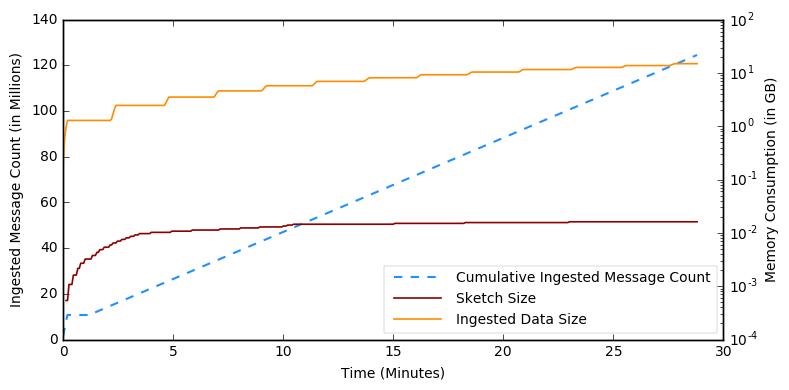

In [29]:
N = 8
leaf_node_size = 8 + (8 * N * 4) + (8 * ((N + 1) * N) / 2)

apd_t_end = fitted_ing.shape[0]
apd_t_start_v = total_ingested[0, 0]

fig,ax2 = plt.subplots(figsize=(8,4))
leg_ing = plt.plot((apd_total_ingested[:apd_t_end,0] - apd_t_start_v)/(1000 * 60) , fitted_ing[:t_end]/1000000, color='dodgerblue', linestyle='--', lw=1.5, label='Cumulative Ingested Message Count')
pylab.ylabel('Ingested Message Count (in Millions)', fontsize=10)
#ax2.tick_params(axis='y', colors='darkblue')
#ax2.yaxis.label.set_color('darkblue')
#ax2.xaxis.set_major_formatter(NullFormatter())
#pylab.xlim(0, 550)
pylab.xlabel('Time (Minutes)', fontsize=10)

ax = ax2.twinx()
leg_mem = plt.semilogy((apd_total_mem[:apd_t_end,0] - apd_t_start_v)/(1000 * 60), apd_total_mem[:t_end,1]* leaf_node_size *1024 * 1024/(1024*1024*1024), color='darkred', lw=1.2, label='Sketch Size')
leg_ing_size = plt.semilogy((apd_total_ingested[:t_end,0] - apd_t_start_v)/(1000 * 60), apd_total_ingested[:t_end,1] * 129/(1024*1024*1024), color='darkorange', lw=1.2, label='Ingested Data Size')
#ax.tick_params(axis='y', colors='darkorange')
pylab.ylabel('Memory Consumption (in GB)', fontsize=10)
#pylab.xlim(0, 550)
#ax.yaxis.label.set_color('darkorange')

lns = leg_ing + leg_mem + leg_ing_size
labs = [l.get_label() for l in lns]
leg = ax2.legend(lns, labs, fontsize=10, ncol=1, loc='lower right', borderaxespad=0.5, handlelength=4)
#leg = ax3.legend(lns, labs, fontsize=9)
leg.get_frame().set_linewidth(0.1)
pylab.tight_layout()
plt.savefig(base +'/figs/ing-and-mem-usage.pdf', dpi=300)

In [30]:
(total_ingested[t_end-1,1] * 129/(1024*1024*1024))/(total_mem[t_end-1,1]* leaf_node_size *1024 * 1024/(1024*1024*1024))

925.73237436405134